<a href="https://colab.research.google.com/github/Akash-Git20/MBTI/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
path = "/content/drive/MyDrive/Dataset/mbti_1.csv"
dataset = pd.read_csv(path)

In [ ]:
dataset.head

<bound method NDFrame.head of       type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]>

In [ ]:
dataset.isnull().any()

type     False
posts    False
dtype: bool

In [ ]:
nRow, nCol = dataset.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8675 rows and 2 columns


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
dataset.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('posts').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in _df_3.groupby('index')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('index')
_ = plt.ylabel('type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['posts'].value_counts()
    for x_label, grp in _df_4.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('posts')

In [ ]:
types = np.unique(np.array(dataset['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [ ]:
total = dataset.groupby(['type']).count()
total

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


Text(0.5, 1.0, 'Total posts for each personality type')

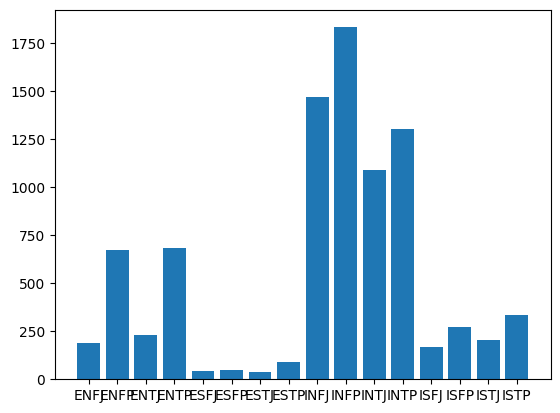

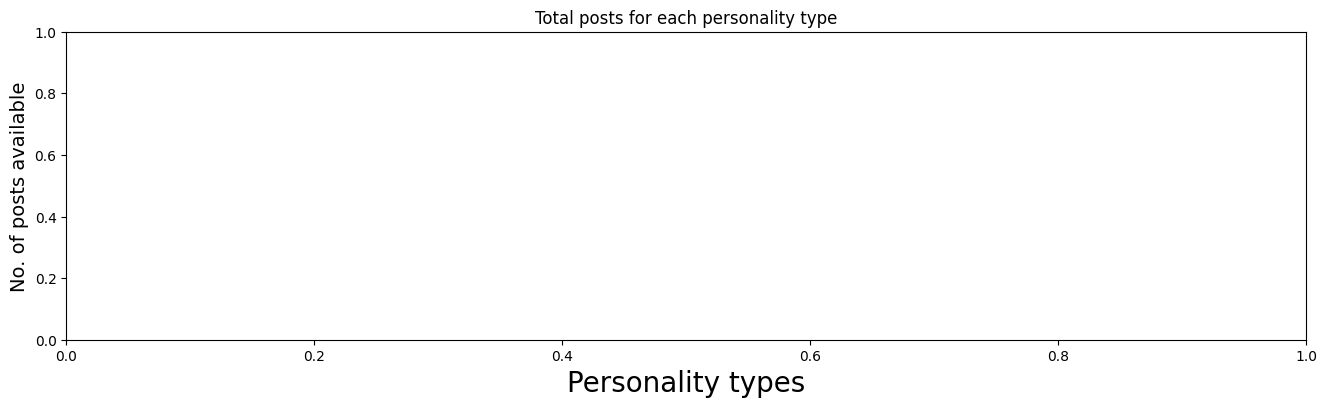

In [ ]:
plt.bar(np.array(total.index), height = total['posts'],)
plt.figure(figsize = (16, 4))
plt.xlabel('Personality types', size = 20)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')

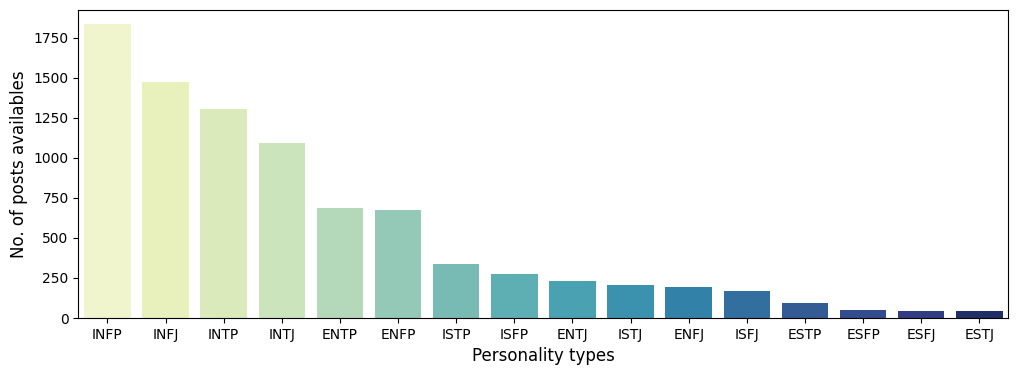

In [ ]:
cnt_srs = dataset['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, palette="YlGnBu")
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

In [ ]:
df = dataset.copy()
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))

In [ ]:
df

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576
...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,15.92,125.3300
8671,ENFP,'So...if this thread already exists someplace ...,26.18,125.6144
8672,INTP,'So many questions when i do these things. I ...,18.96,169.7764
8673,INFP,'I am very conflicted right now when it comes ...,34.10,57.0336


<ipython-input-71-630822a4098b>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="type", y="words_per_comment",data=df,palette="YlGnBu")


<Axes: xlabel='type', ylabel='words_per_comment'>

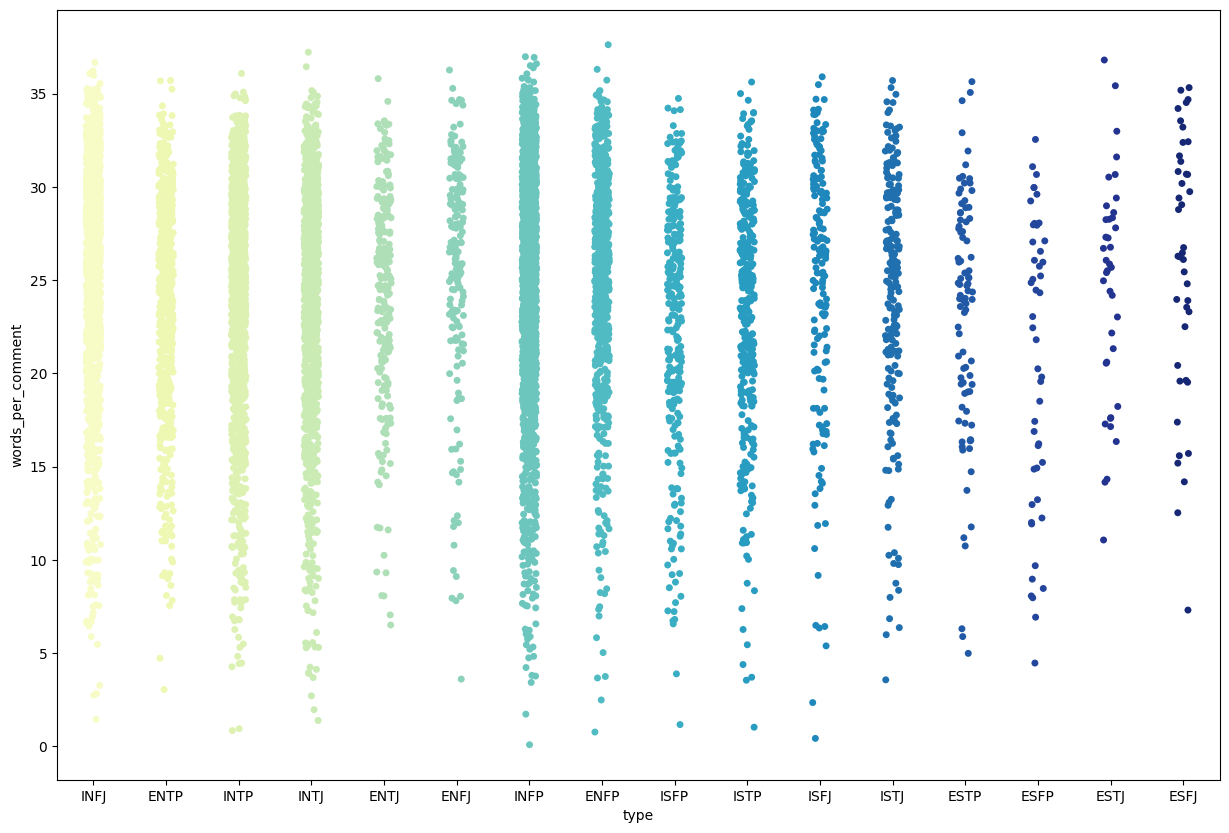

In [ ]:
plt.figure(figsize=(15,10))
sns.stripplot(x="type", y="words_per_comment",data=df,palette="YlGnBu")

<Figure size 1500x1000 with 0 Axes>

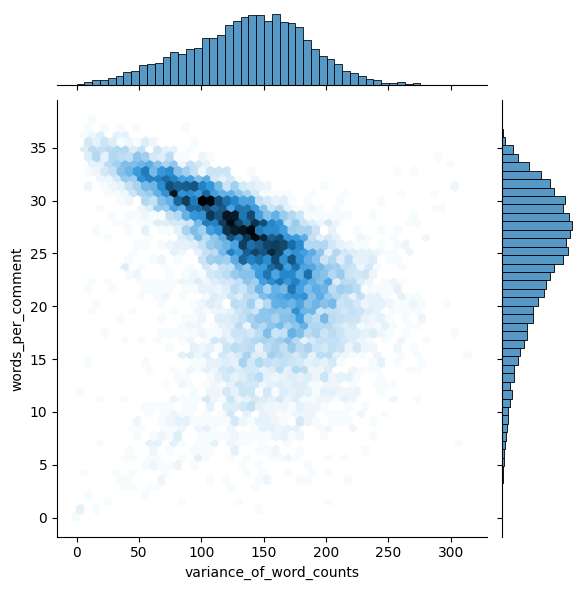

In [ ]:
plt.figure(figsize=(15,10))
sns.jointplot(x="variance_of_word_counts", y="words_per_comment", data=df, kind="hex")

<Figure size 2400x500 with 0 Axes>

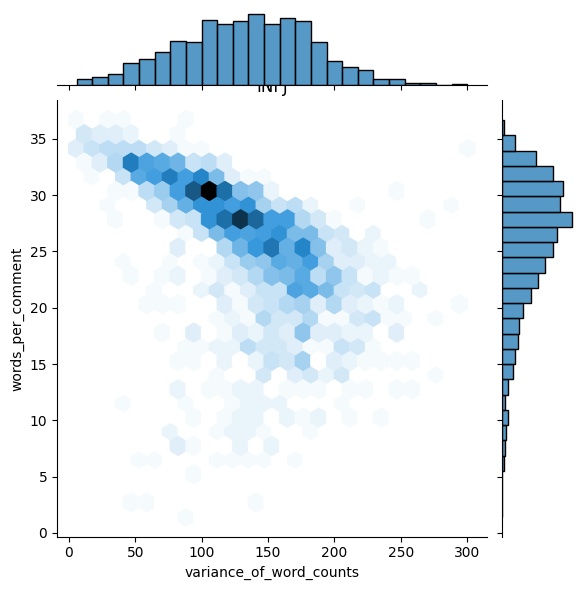

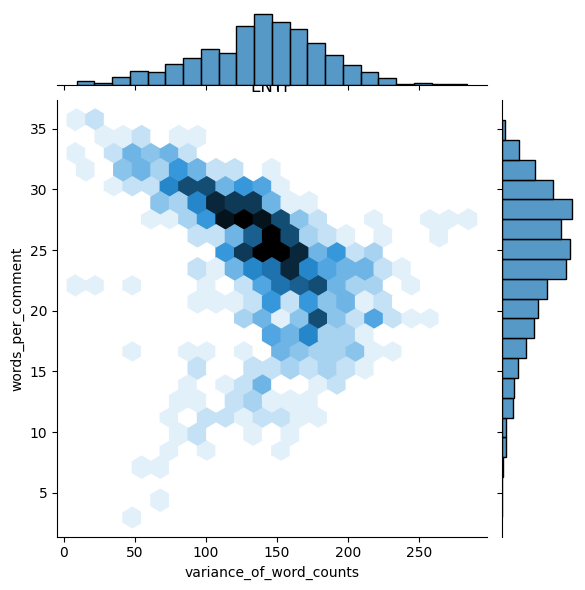

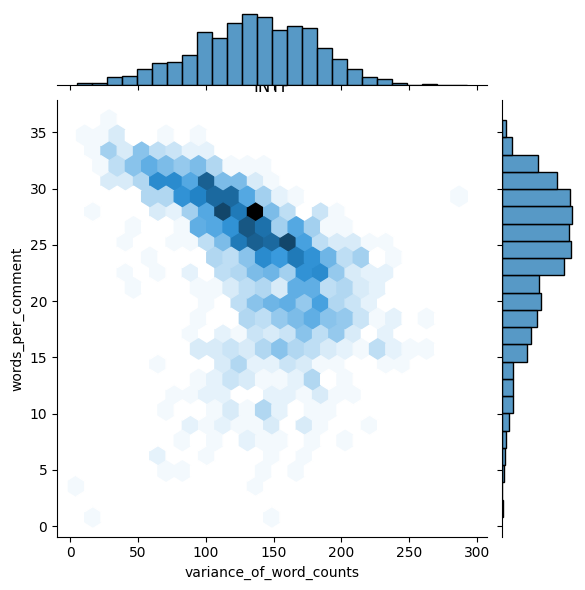

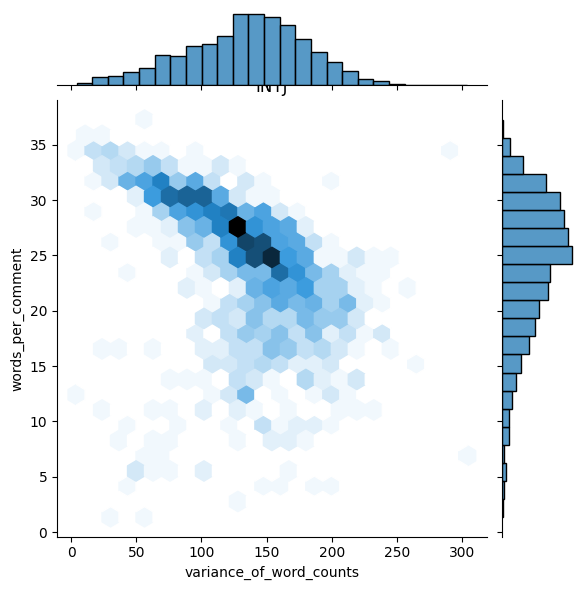

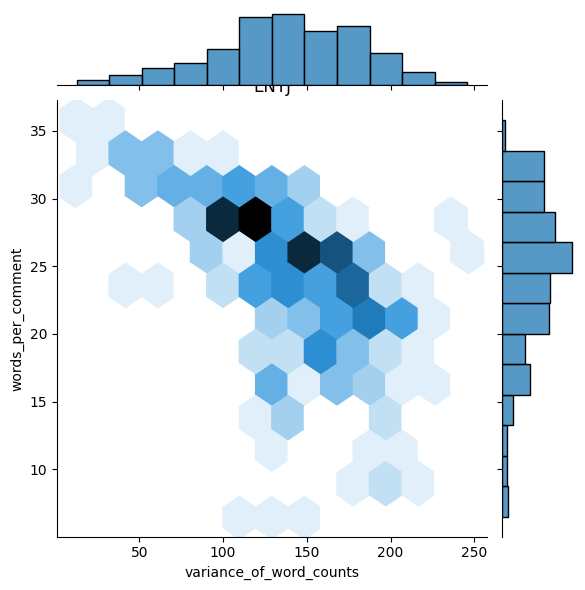

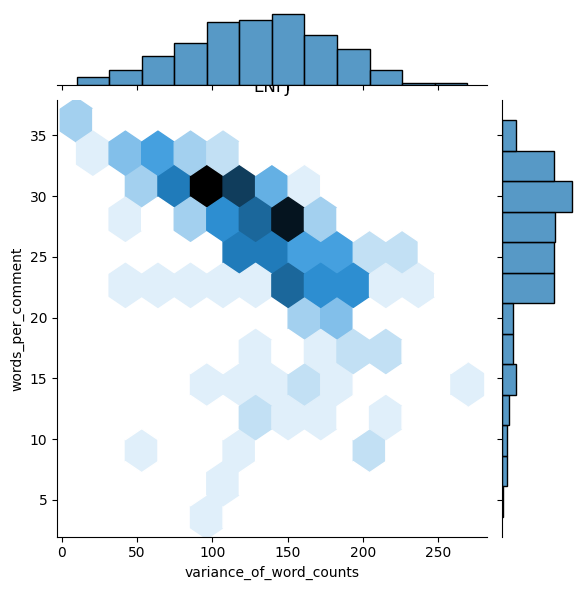

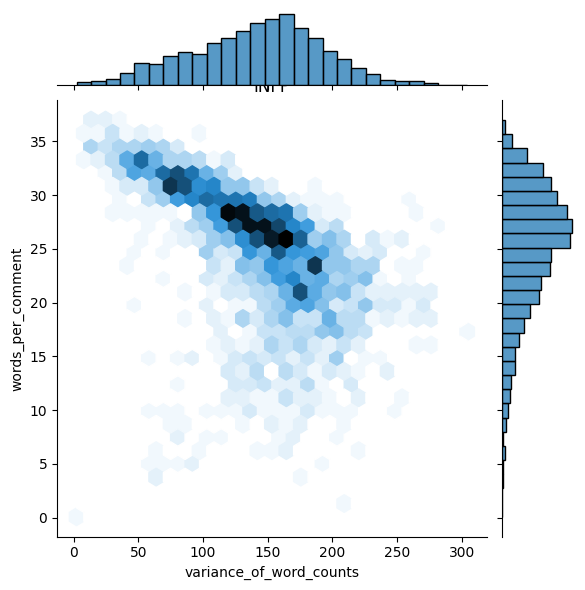

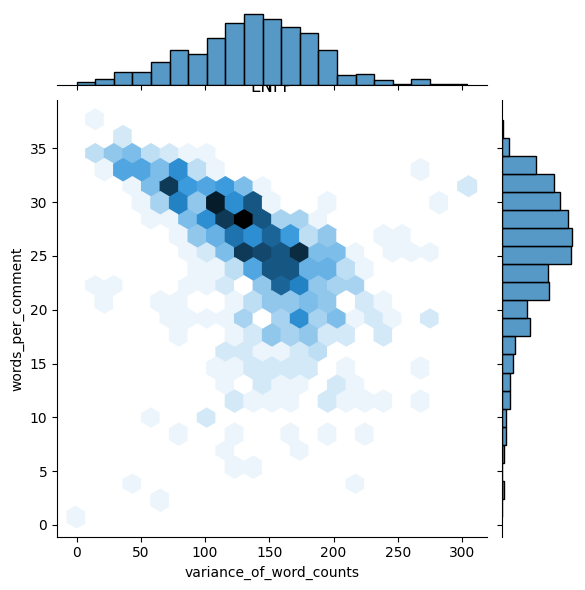

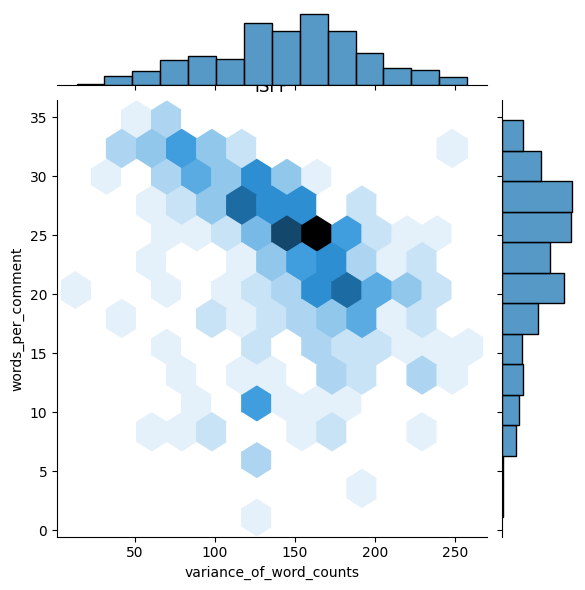

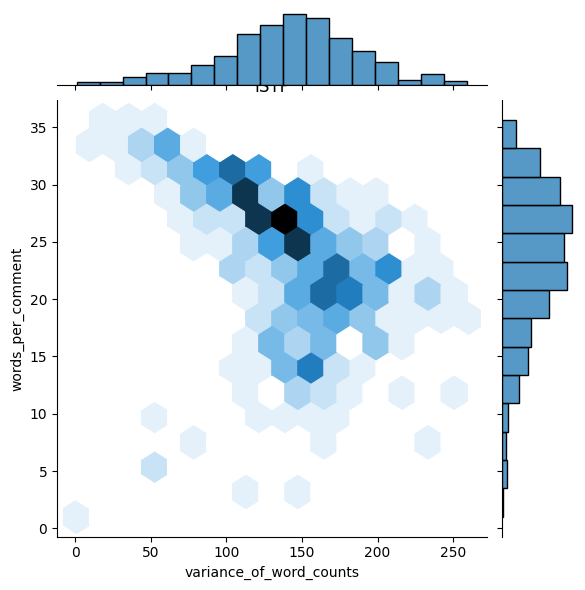

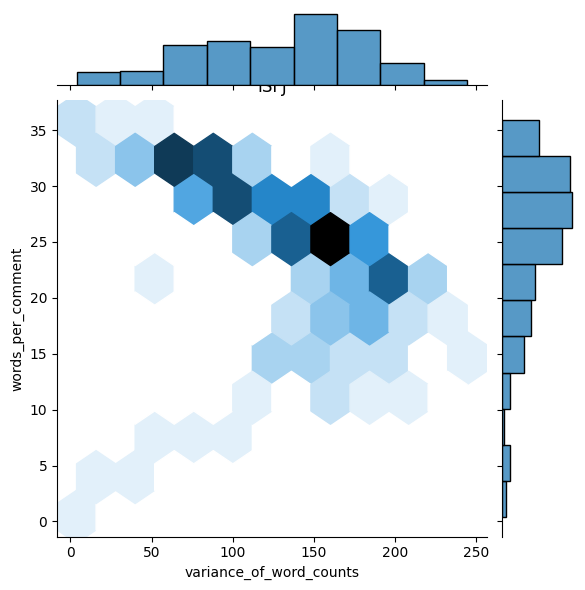

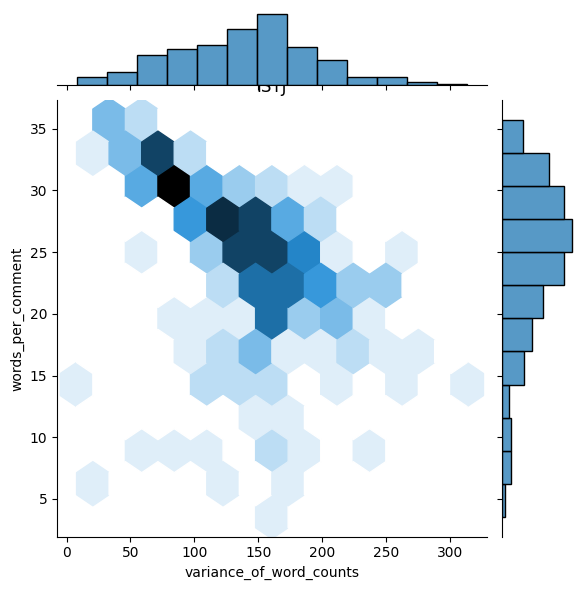

In [ ]:
plt.figure(figsize=(24, 5))
i = df['type'].unique()
k = 0

for m in range(1,3):
  for n in range(1,7):
    df_1 = df[df['type'] == i[k]]
    sns.jointplot(x="variance_of_word_counts", y="words_per_comment", data=df_1, kind="hex" )
    plt.title(i[k])
    k+=1
  plt.show()

<ipython-input-78-d64729ca1ef3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")


Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

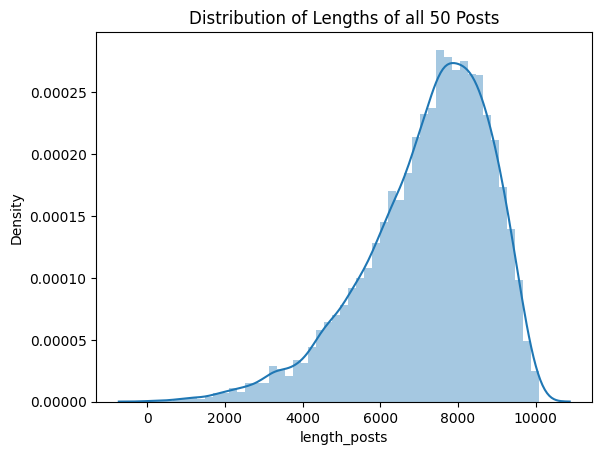

In [ ]:
df["length_posts"] = df["posts"].apply(len)
sns.distplot(df["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

In [ ]:
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
pd.Series(words).value_counts()

I                                                                                        387957
to                                                                                       290168
the                                                                                      270699
a                                                                                        230918
and                                                                                      219498
                                                                                          ...  
http://img.photobucket.com/albums/v358/AlexHall74/20080801_PugWedding/20100801104.jpg         1
super-voodoo                                                                                  1
ESTX?|||OK,                                                                                   1
eyes/nose                                                                                     1
(Awakening)                             

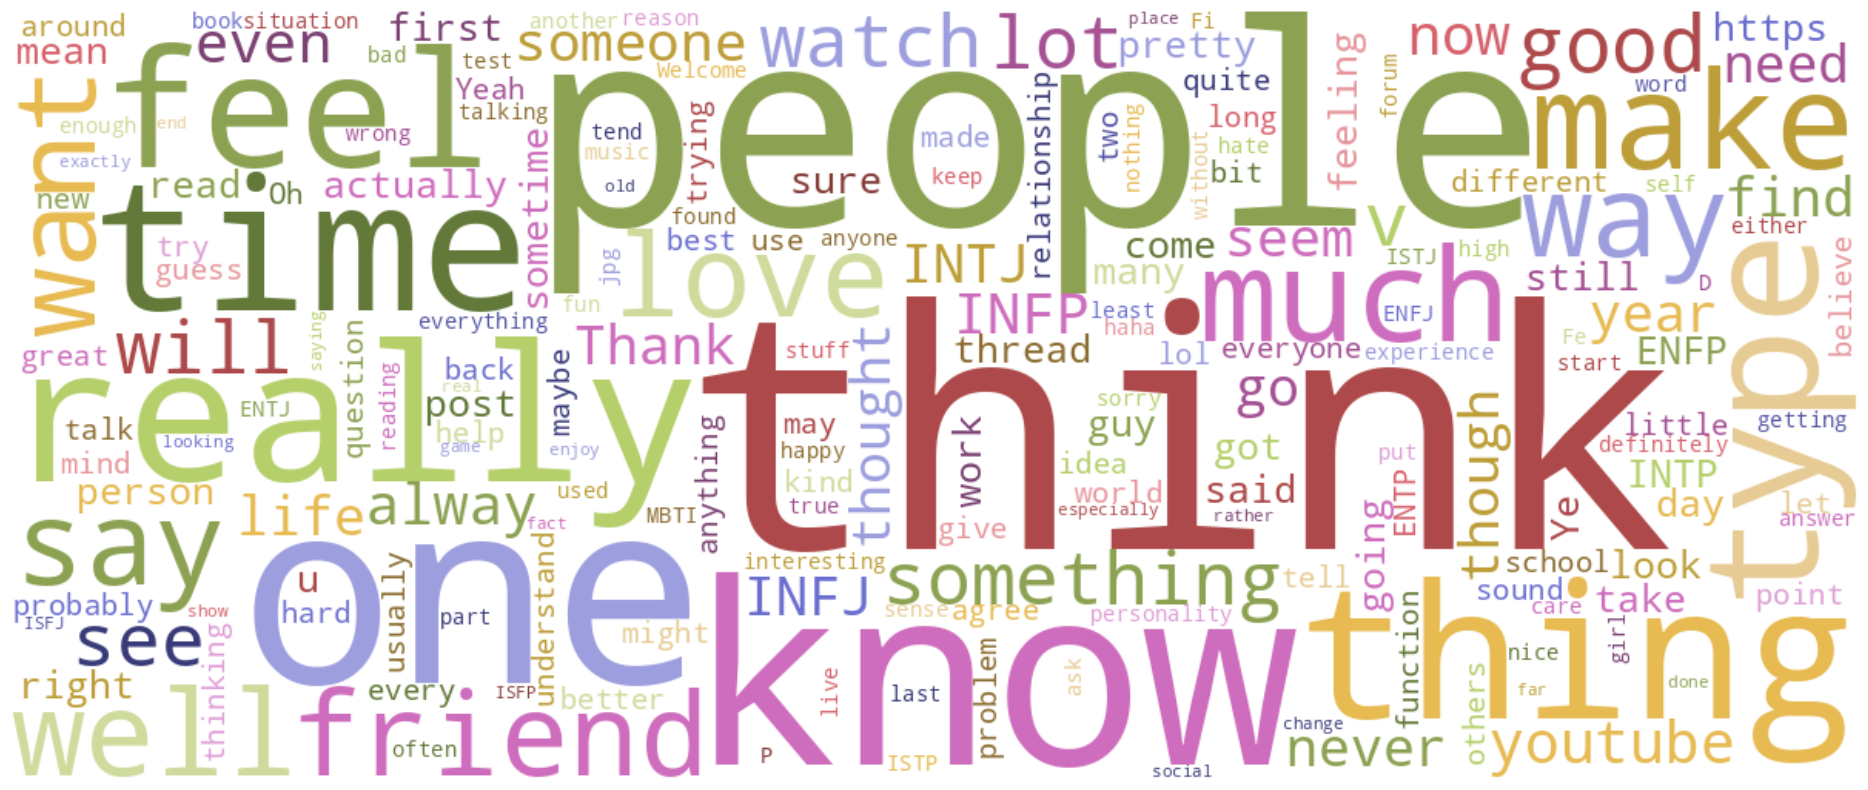

In [ ]:
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(words))

plt.figure(figsize=(25,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

<ipython-input-90-0147661fb570>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)


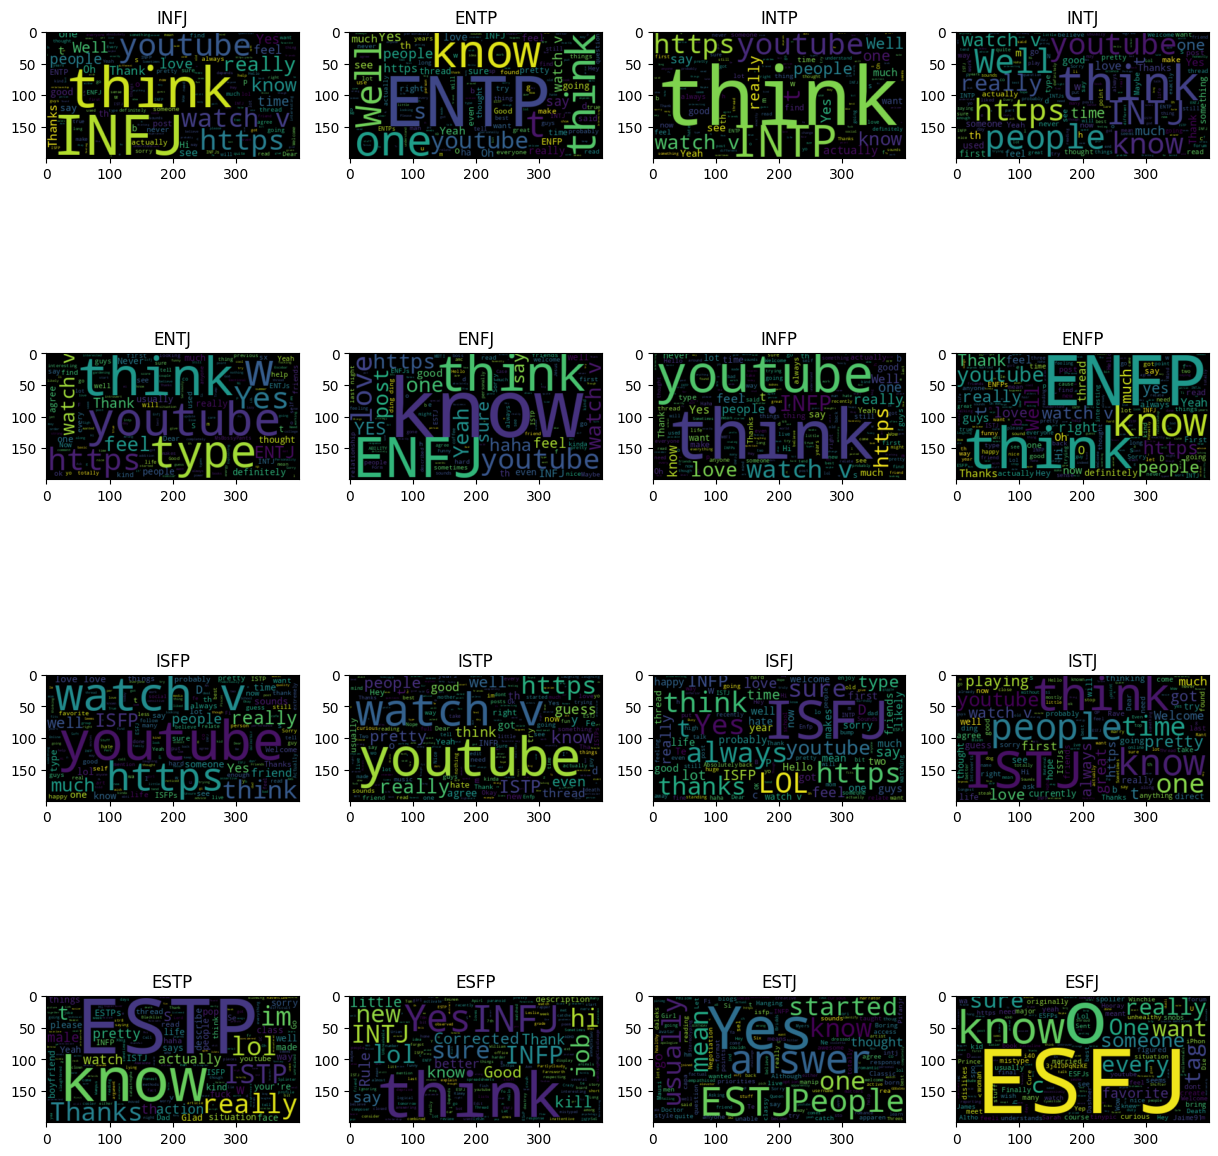

In [ ]:
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1